In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

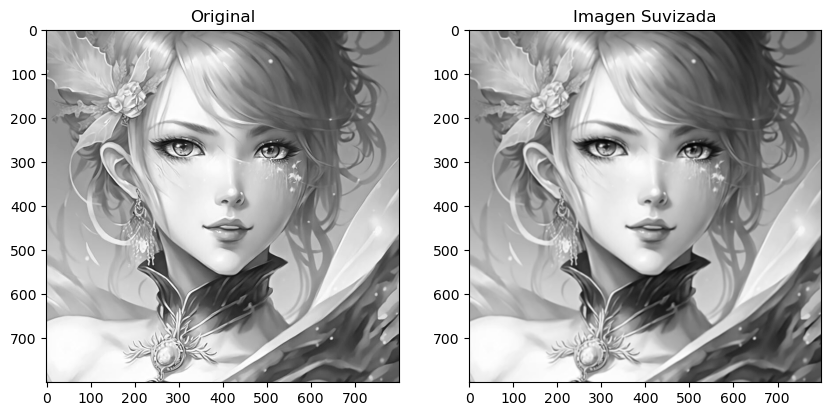

In [18]:
# Cargar la imagen
image = cv2.imread('banshee07.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar filtro Gaussiano
smoothed_img = cv2.GaussianBlur(image, (5, 5), 0)

# Mostrar la imagen suavizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(smoothed_img, cmap='gray'), plt.title('Imagen Suvizada')
plt.show()

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

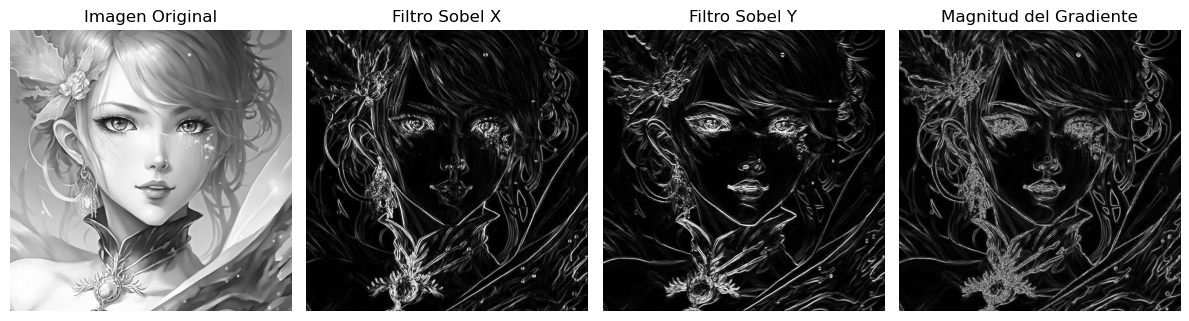

In [21]:
# Cargar la imagen
image = cv2.imread('banshee07.jpg', cv2.IMREAD_GRAYSCALE)

#Aplicar filtro de sobel 
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

#Calculo de Gradientes
magnitude = np.sqrt(sobelx**2 + sobely**2)
magnitude = np.uint8(magnitude)

#Mostrar imágenes 

plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1), plt.imshow(image, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(1, 4, 2), plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray')
plt.title('Filtro Sobel X'), plt.axis('off')

plt.subplot(1, 4, 3), plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray')
plt.title('Filtro Sobel Y'), plt.axis('off')

plt.subplot(1, 4, 4), plt.imshow(magnitude, cmap='gray')
plt.title('Magnitud del Gradiente'), plt.axis('off')

plt.tight_layout()
plt.show()

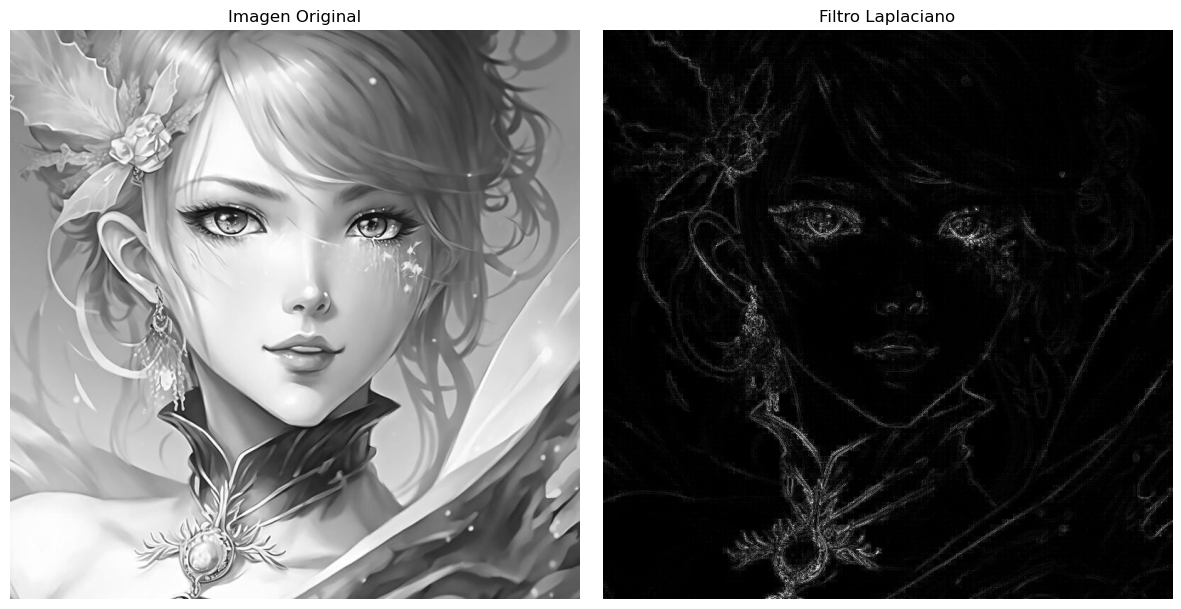

In [24]:


import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('banshee07.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar el filtro Laplaciano
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Convertir la imagen Laplaciana a tipo uint8
laplacian = cv2.convertScaleAbs(laplacian)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(1, 2, 2), plt.imshow(laplacian, cmap='gray')
plt.title('Filtro Laplaciano'), plt.axis('off')

plt.tight_layout()
plt.show()

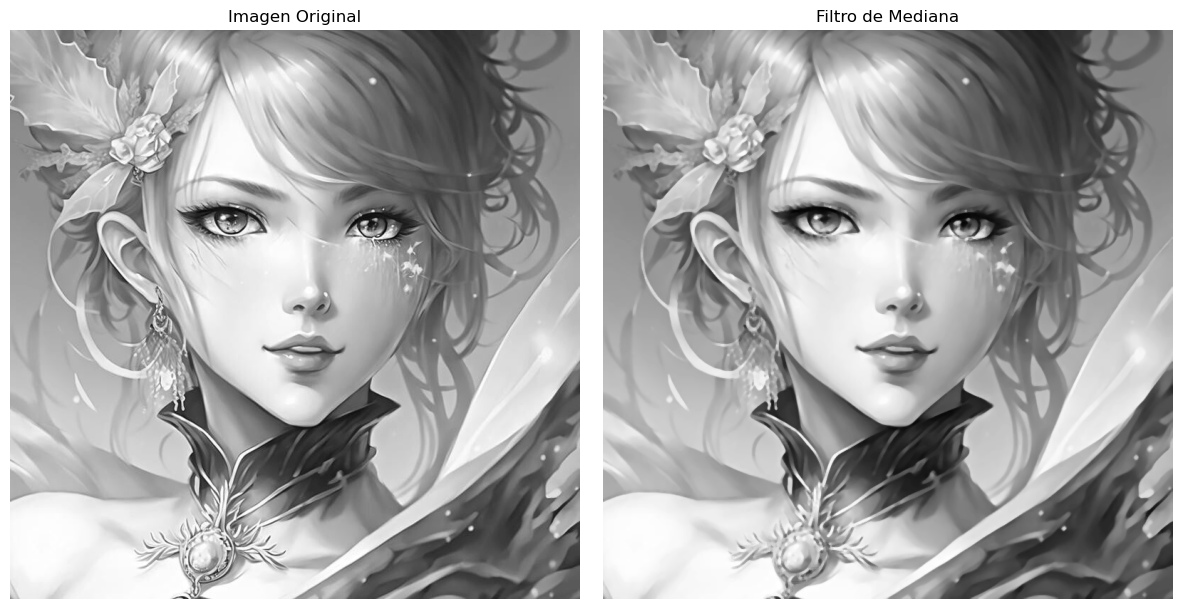

In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen en escala de grises
image = cv2.imread('banshee07.jpg', cv2.IMREAD_GRAYSCALE)
 
# Aplicar filtro de mediana
median_filtered_image = cv2.medianBlur(image, 5)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(1, 2, 2), plt.imshow(median_filtered_image, cmap='gray')
plt.title('Filtro de Mediana'), plt.axis('off')

plt.tight_layout()
plt.show()

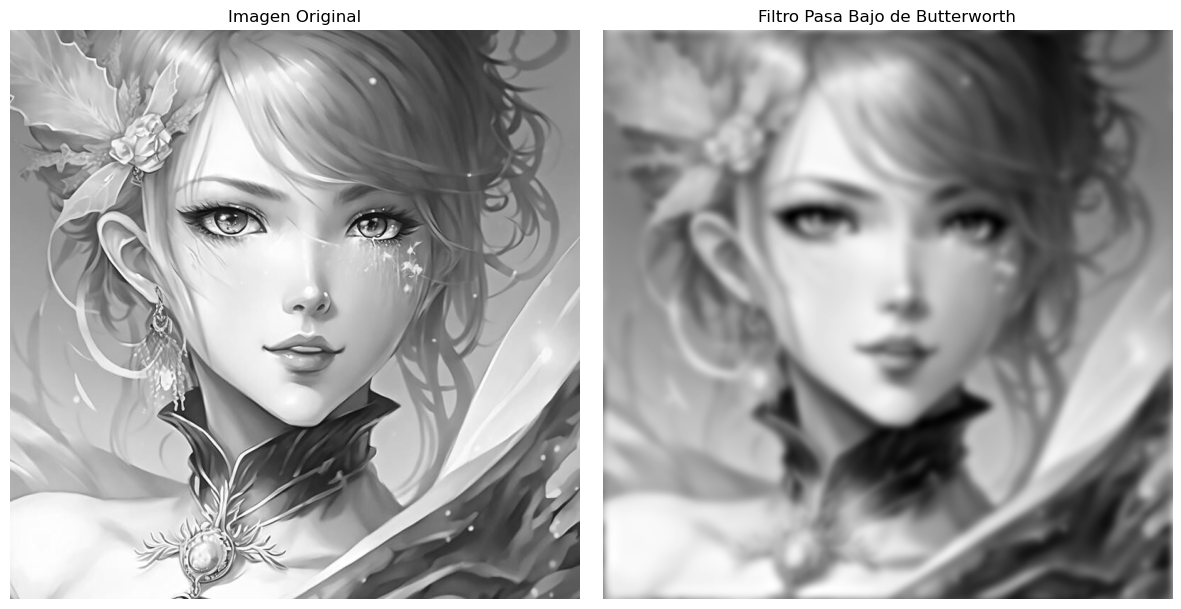

In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def butterworth_lowpass_filter(shape, cutoff, order):
    P, Q = shape
    H = np.zeros((P, Q))
    D0 = cutoff
    
    for u in range(P):
        for v in range(Q):
            D = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
            H[u, v] = 1 / (1 + (D / D0)**(2 * order))
    
    return H

# Cargar la imagen en escala de grises
image = cv2.imread('banshee07.jpg', cv2.IMREAD_GRAYSCALE)
image = np.float32(image) / 255

# Obtener las dimensiones de la imagen
rows, cols = image.shape

# Realizar la transformada de Fourier y centrar la frecuencia
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

# Crear el filtro pasa bajo de Butterworth
cutoff = 30  # Frecuencia de corte
order = 2    # Orden del filtro
H = butterworth_lowpass_filter((rows, cols), cutoff, order)

# Aplicar el filtro en el dominio de la frecuencia
filtered_dft_shift = dft_shift * H

# Realizar la transformada inversa para obtener la imagen filtrada
filtered_dft = np.fft.ifftshift(filtered_dft_shift)
filtered_image = np.fft.ifft2(filtered_dft)
filtered_image = np.abs(filtered_image)

# Normalizar la imagen filtrada para la visualización
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
filtered_image = filtered_image.astype(np.uint8)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtro Pasa Bajo de Butterworth')
plt.axis('off')

plt.tight_layout()
plt.show()


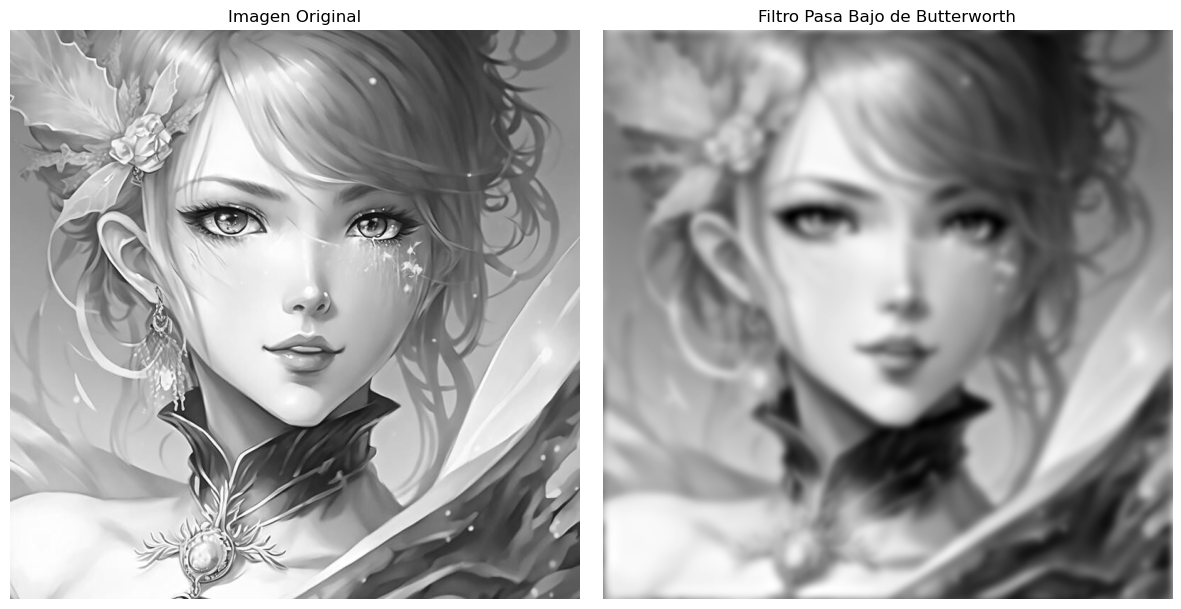

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def butterworth_lowpass_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2  # Punto central de la imagen
    
    # Cálculo de la matriz de distancias
    x = np.arange(-ccol, cols-ccol)
    y = np.arange(-crow, rows-crow)
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    
    # Cálculo del filtro Butterworth
    H = 1 / (1 + (D / cutoff)**(2 * order))
    
    return H

# Cargar la imagen en escala de grises
image = cv2.imread('banshee07.jpg', cv2.IMREAD_GRAYSCALE)

# Normalizar la imagen
image = np.float32(image) / 255.0

# Obtener las dimensiones de la imagen
rows, cols = image.shape

# Crear el filtro pasa bajo de Butterworth
cutoff = 30  # Frecuencia de corte
order = 2    # Orden del filtro
H = butterworth_lowpass_filter((rows, cols), cutoff, order)

# Aplicar la transformada de Fourier a la imagen
fimage = np.fft.fft2(image)
fimage_shift = np.fft.fftshift(fimage)

# Aplicar el filtro en el dominio de la frecuencia
filtered_fimage_shift = fimage_shift * H

# Aplicar la transformada inversa de Fourier
filtered_fimage = np.fft.ifftshift(filtered_fimage_shift)
filtered_image = np.fft.ifft2(filtered_fimage)
filtered_image = np.abs(filtered_image)

# Normalizar la imagen filtrada para la visualización
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
filtered_image = filtered_image.astype(np.uint8)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtro Pasa Bajo de Butterworth')
plt.axis('off')

plt.tight_layout()
plt.show()

C:\Users\jumunoz\AppData\Local\Temp\ipykernel_27600\2221765496.py:16: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (cutoff / D)**(2 * order))


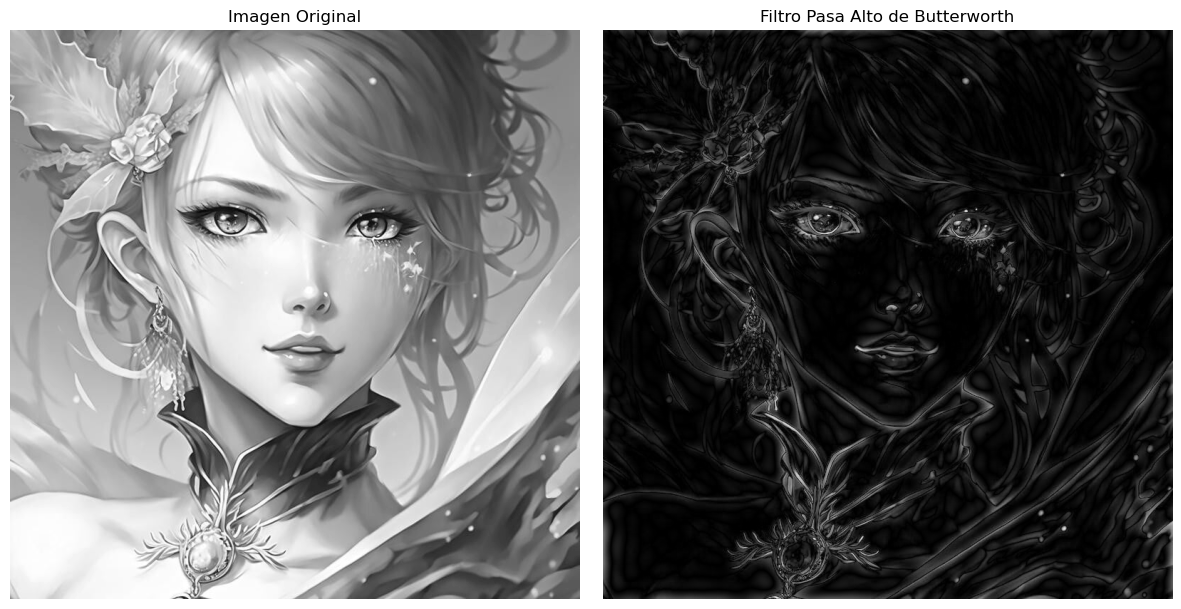

In [79]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def butterworth_highpass_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2  # Punto central de la imagen
    
    # Cálculo de la matriz de distancias
    x = np.arange(-ccol, cols-ccol)
    y = np.arange(-crow, rows-crow)
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    
    # Cálculo del filtro Butterworth
    H = 1 / (1 + (cutoff / D)**(2 * order))
    
    return H

# Cargar la imagen en escala de grises
image = cv2.imread('banshee07.jpg', cv2.IMREAD_GRAYSCALE)

# Normalizar la imagen
image = np.float32(image) / 255.0

# Obtener las dimensiones de la imagen
rows, cols = image.shape

# Crear el filtro pasa alto de Butterworth
cutoff = 20  # Frecuencia de corte
order = 10    # Orden del filtro
H = butterworth_highpass_filter((rows, cols), cutoff, order)

# Aplicar la transformada de Fourier a la imagen
fimage = np.fft.fft2(image)
fimage_shift = np.fft.fftshift(fimage)

# Aplicar el filtro en el dominio de la frecuencia
filtered_fimage_shift = fimage_shift * H

# Aplicar la transformada inversa de Fourier
filtered_fimage = np.fft.ifftshift(filtered_fimage_shift)
filtered_image = np.fft.ifft2(filtered_fimage)
filtered_image = np.abs(filtered_image)

# Normalizar la imagen filtrada para la visualización
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
filtered_image = filtered_image.astype(np.uint8)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtro Pasa Alto de Butterworth')
plt.axis('off')

plt.tight_layout()
plt.show()

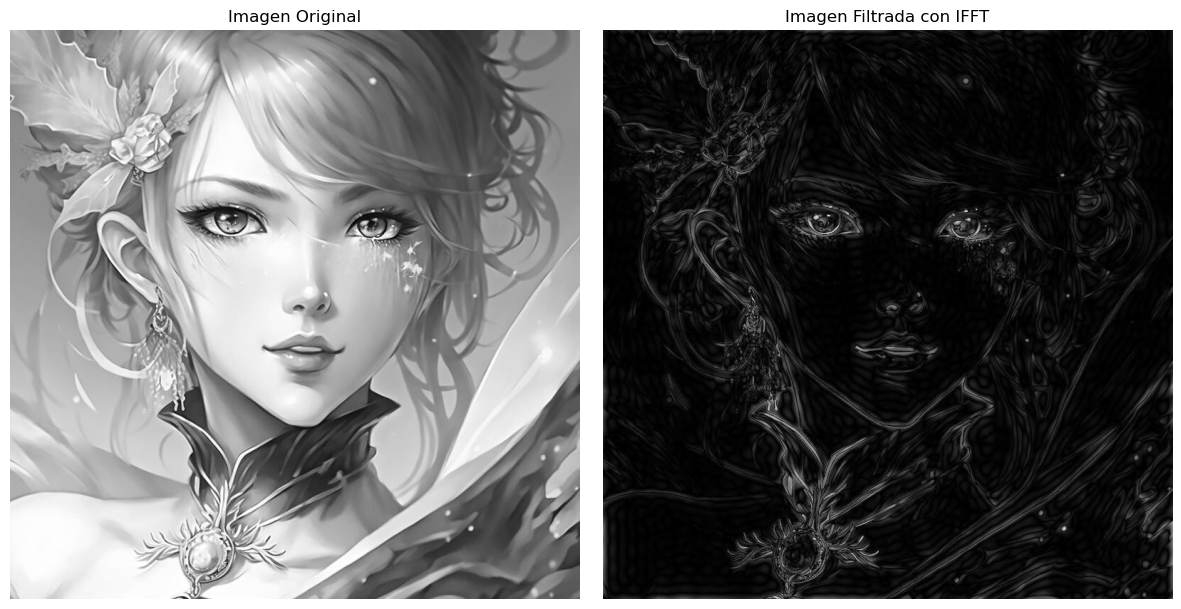

In [81]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar una imagen en escala de grises
image = cv2.imread('banshee07.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar la transformada de Fourier
fimage = np.fft.fft2(image)
fimage_shift = np.fft.fftshift(fimage)

# Aplicar un filtro en el dominio de la frecuencia (por ejemplo, un filtro pasa alto)
# En este caso, simplemente multiplicamos la imagen en frecuencia por un filtro ideal pasa alto
rows, cols = image.shape
cutoff = 30  # Frecuencia de corte
H = np.ones((rows, cols), np.uint8)
H[int(rows/2)-cutoff:int(rows/2)+cutoff, int(cols/2)-cutoff:int(cols/2)+cutoff] = 0
filtered_fimage_shift = fimage_shift * H

# Aplicar la transformada inversa de Fourier
filtered_fimage = np.fft.ifftshift(filtered_fimage_shift)
filtered_image = np.fft.ifft2(filtered_fimage)
filtered_image = np.abs(filtered_image)

# Normalizar la imagen filtrada para la visualización
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
filtered_image = filtered_image.astype(np.uint8)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Imagen Filtrada con IFFT')
plt.axis('off')

plt.tight_layout()
plt.show()

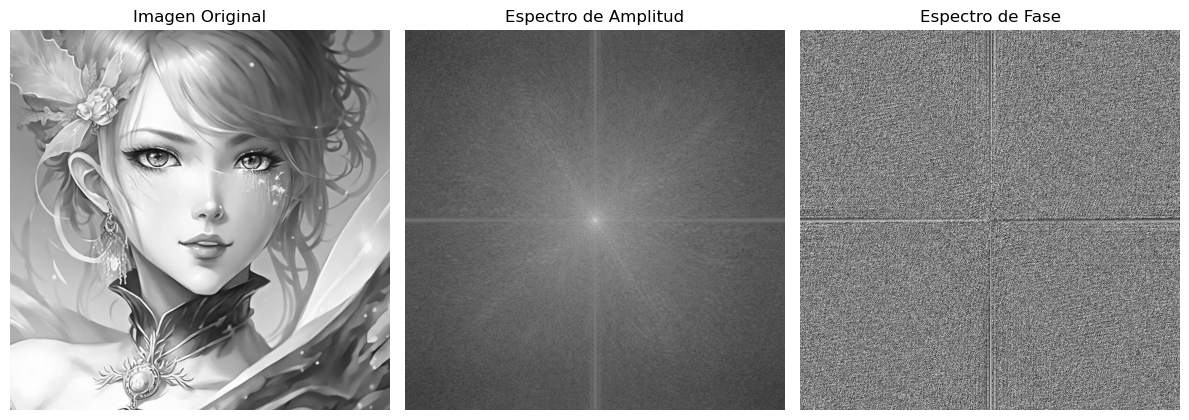

In [92]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar una imagen en escala de grises
image = cv2.imread('banshee07.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar la transformada de Fourier
fimage = np.fft.fft2(image)
fimage_shift = np.fft.fftshift(fimage)

# Calcular el espectro de amplitud (magnitud) y el espectro de fase
magnitude_spectrum = np.abs(fimage_shift)
phase_spectrum = np.angle(fimage_shift)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Espectro de Amplitud')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(phase_spectrum, cmap='gray')
plt.title('Espectro de Fase')
plt.axis('off')

plt.tight_layout()
plt.show()
